In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc

import datetime
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

import textwrap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn import tree


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)


In [2]:
df = pd.read_csv("../data/viewing_rating.csv", encoding='cp932')

In [3]:
# time型に
df.start_at=pd.to_datetime(df.start_at)
# averageの％を削除
df["average"] =  df["average"].apply(lambda x : float(x[:-1]) )


In [4]:
df["start_at_year"] = df["start_at"].dt.year
df["start_at_month"] = df["start_at"].dt.month

In [5]:
df["drama_key"] = df.start_at.dt.strftime("%y")+df.start_at.dt.strftime("%m")+"_"+df.TV_station+"_"+df.time_table

In [6]:
import json

f = open("../data/drama_info0115.json", 'r')
print(f)
drama_info_json = json.load(f)

<_io.TextIOWrapper name='../data/drama_info0115.json' mode='r' encoding='UTF-8'>


In [7]:
# def addDramaInfo (drama_title) 
#     main_actor_only_json[drama_title]
    


In [8]:
print (textwrap.shorten(str(drama_info_json), 1000))

{'1910_CX_月21': {'main_actor1': 'ディーン・フジオカ', 'main_actor2': '岩田剛典', 'original_work': 'アーサー・コナン・ドイル「シャーロック・ホームズ」'}, '1910_CX_火22': {'main_actor1': '阿部寛', 'main_actor2': '吉田羊', 'original_work': ''}, '1910_TBS_火22': {'main_actor1': '波瑠', 'main_actor2': '中川大志', 'original_work': 'いくえみ綾「G線上のあなたと私」'}, '1910_NTV_水22': {'main_actor1': '高畑充希', 'main_actor2': '橋本愛', 'original_work': ''}, '1910_EX_木21': {'main_actor1': '米倉涼子', 'main_actor2': 'ユースケ・サンタマリア', 'original_work': ''}, '1910_CX_木22': {'main_actor1': '新木優子', 'main_actor2': '高良健吾', 'original_work': '瀧波ユカリ「モトカレマニア」'}, '1910_NTV_木23': {'main_actor1': '本田翼', 'main_actor2': '金子大地', 'original_work': ''}, '1910_TBS_金22': {'main_actor1': '福士蒼汰', 'main_actor2': '菜々緒', 'original_work': 'キリエ「4分間のマリーゴールド」'}, '1910_EX_金23': {'main_actor1': 'オダギリジョー', 'main_actor2': '麻生久美子', 'original_work': ''}, '1910_NTV_土22': {'main_actor1': '生田斗真', 'main_actor2': '安田顕', 'original_work': ''}, '1910_EX_土23': {'main_actor1': '田中圭', 'main_actor2': '吉田鋼太郎', [...]


In [9]:
df["main_actor1"] = ""
df["main_actor2"] = ""
df["original_work"] = ""

In [10]:
for tmp_index in range(len(df)):
    tmp_drama_key = df.iloc[tmp_index]["drama_key"]
    if tmp_drama_key in drama_info_json.keys():
#         print(drama_info_json[tmp_drama_key]["main_actor1"])
        df["main_actor1"][tmp_index] = drama_info_json[tmp_drama_key]["main_actor1"]
        df["main_actor2"][tmp_index] = drama_info_json[tmp_drama_key]["main_actor2"]
        df["original_work"][tmp_index] = drama_info_json[tmp_drama_key]["original_work"]
#         print("yes"+tmp_drama_title)
    else:
        print(tmp_drama_key)

1910_EX_木22


In [11]:
def make_person_key_df (actor_actress):
    actor_actress_list = []
    for column in actor_actress.columns:
        if column == "ranking":
            continue
        actor_actress_list.extend(actor_actress[column].values.tolist())
    print ("元の数"+ str(len(actor_actress_list)))
    # uniqueにする
    actor_actress_list = list(set(actor_actress_list))
    #nan を除去
    actor_actress_list = [actor for actor in actor_actress_list if type(actor) is not float ]
    print ("後の数"+str(len(actor_actress_list)))

    df_pivot = pd.DataFrame( columns=actor_actress_list, index=[str(n) for n in range(2008,2020)])

    #pivot 形式に整形する
    for tmp_name in df_pivot.columns:
        for year in actor_actress.columns:
            if year == "ranking": continue
            if  len(actor_actress[actor_actress[year] == tmp_name].ranking) > 0:
                df_pivot.loc[year][tmp_name] = (actor_actress[actor_actress[year] == tmp_name].ranking).values[0]
    return (df_pivot)
    

In [12]:
df_actress = pd.read_csv("../data/actress_power.csv", encoding='cp932')
df_actress_pivot = make_person_key_df(df_actress)


元の数360
後の数62


In [13]:
df_actor = pd.read_csv("../data/actor_power.csv", encoding='cp932')
df_actor_pivot = make_person_key_df(df_actor)

元の数372
後の数65


In [14]:
df_actress_pivot

,篠原涼子,江角マキコ,宮_あおい,堀北真希,桐谷美玲,木村佳乃,黒木瞳,有村架純,黒木メイサ,真矢みき,松たか子,井上真央,榮倉奈々,仲間由紀恵,石原さとみ,能年玲奈,松下奈緒,広瀬アリス,橋本環奈,吉瀬美智子,小雪,天海祐希,観月ありさ,薬師丸ひろ子,菅野美穂,北川景子,深田恭子,芦田愛菜,武井咲,松嶋菜々子,山口智子,樹木希林,吉高由里子,土屋太鳳,永作博美,長澤まさみ,高畑充希,杏,新垣結衣,石田ゆり子,上戸彩,藤原紀香,佐々木希,蒼井優,竹内結子,上野樹里,戸田恵梨香,多部未華子,波瑠,柴咲コウ,常盤貴子,木村文乃,広瀬すず,吉永小百合,優香,米倉涼子,菜々緒,吉田羊,小泉今日子,柴崎コウ,深津絵里,綾瀬はるか
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,21,NaN,10,15,NaN,NaN,14,NaN,23,18,16,28,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,30,1,29,NaN,5,NaN,20,NaN,NaN,3,11,NaN,NaN,NaN,NaN,17,NaN,NaN,9,NaN,4,27,NaN,26,8,NaN,25,NaN,NaN,7,24,NaN,NaN,22,12,19,NaN,NaN,NaN,NaN,13,6
2011,12,NaN,9,14,NaN,NaN,30,NaN,7,20,19,27,NaN,5,21,NaN,23,NaN,NaN,NaN,NaN,6,24,NaN,1,15,17,NaN,NaN,8,28,NaN,NaN,NaN,29,NaN,NaN,NaN,10,NaN,3,NaN,NaN,25,13,18,NaN,NaN,NaN,4,NaN,NaN,NaN,22,NaN,26,NaN,NaN,16,NaN,11,2
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,14,20,30,2,NaN,NaN,NaN,NaN,NaN,NaN,23,17,NaN,10,8,25,29,NaN,NaN,NaN,NaN,9,26,28,6,4,18,NaN,21,12,NaN,24,NaN,NaN,NaN,22,NaN,15,5,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,19,16,13,NaN,NaN,11,NaN,27,1
2015,13,NaN,NaN,2,29,NaN,NaN,NaN,NaN,NaN,11,20,NaN,3,12,17,NaN,NaN,NaN,27,NaN,8,NaN,NaN,15,4,18,NaN,23,14,NaN,NaN,26,NaN,NaN,22,NaN,7,5,NaN,10,NaN,21,NaN,16,30,NaN,NaN,NaN,6,NaN,NaN,NaN,25,19,9,NaN,NaN,24,NaN,28,1
2016,14,NaN,29,6,10,NaN,NaN,3,NaN,NaN,17,30,NaN,9,5,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,18,2,8,NaN,23,21,NaN,NaN,NaN,NaN,NaN,22,NaN,11,4,NaN,12,NaN,NaN,NaN,26,NaN,NaN,NaN,NaN,13,NaN,NaN,15,25,24,20,27,16,19,NaN,28,1
2017,10,NaN,NaN,15,9,NaN,NaN,6,NaN,NaN,NaN,28,26,7,3,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,17,4,5,NaN,23,22,NaN,NaN,21,19,NaN,16,NaN,14,1,20,12,NaN,30,NaN,29,NaN,NaN,24,NaN,NaN,NaN,NaN,11,NaN,NaN,18,NaN,NaN,27,13,25,2


In [15]:
df_actor_namekey = df_actor_pivot.T.rename_axis('actor_actress').reset_index()

In [16]:
df_actress_namekey = df_actress_pivot.T.rename_axis('actor_actress').reset_index()

In [17]:
df_actress_namekey

,actor_actress,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,篠原涼子,NaN,NaN,21,12,NaN,NaN,14,13,14,10,25,17
1,江角マキコ,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN
2,宮_あおい,NaN,NaN,10,9,NaN,NaN,30,NaN,29,NaN,NaN,NaN
3,堀北真希,NaN,NaN,15,14,NaN,NaN,2,2,6,15,NaN,NaN
4,桐谷美玲,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,10,9,20,23
5,木村佳乃,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
6,黒木瞳,NaN,NaN,14,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,有村架純,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,6,6,6
8,黒木メイサ,NaN,NaN,23,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,真矢みき,NaN,NaN,18,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_merged = pd.merge(df, df_actor_namekey,left_on='main_actor1', right_on='actor_actress', how='left')
#df_merged = pd.merge(df_merged, df_actress_namekey,left_on='main_actor1', right_on='actor_actress', how='right')
#df_merged = pd.merge(df_merged, df_actress_namekey,left_on='main_actor2', right_on='actor_actress', how='right')

In [19]:

df_merged = pd.merge(df_merged, df_actress_namekey,left_on='main_actor1', right_on='actor_actress', how='left'
                     ,suffixes=('_1', '_2'))

In [20]:

df_merged = pd.merge(df_merged, df_actor_namekey,left_on='main_actor2', right_on='actor_actress', how='left'
                     ,suffixes=('_3', '_4') )


In [21]:
df_merged = pd.merge(df_merged, df_actress_namekey,left_on='main_actor2', right_on='actor_actress', how='left'
                    , suffixes=('_3', '_4'),)

In [22]:
# df_merged[["main_actor1","2017","2016","2014"]]
df_merged

,TV_station,time_table,drama_title,Episode1,Episode2,Episode3,Episode4,Episode5,Episode6,Episode7,Episode8,Episode9,Episode10,Episode11,Episode12,Episode13,Episode14,Episode15,average,suii,start_at,start_at_year,start_at_month,drama_key,main_actor1,main_actor2,original_work,actor_actress_1,2008_1,2009_1,2010_1,2011_1,2012_1,2013_1,2014_1,2015_1,2016_1,2017_1,2018_1,2019_1,actor_actress_2,2008_2,2009_2,2010_2,2011_2,2012_2,2013_2,2014_2,2015_2,2016_2,2017_2,2018_2,2019_2,actor_actress_3,2008_3,2009_3,2010_3,2011_3,2012_3,2013_3,2014_3,2015_3,2016_3,2017_3,2018_3,2019_3,actor_actress_4,2008_4,2009_4,2010_4,2011_4,2012_4,2013_4,2014_4,2015_4,2016_4,2017_4,2018_4,2019_4
0,CX,月21,シャーロック,12.8,9.3,9.9,10.6,9.3,8.3,9.9,8.9,9.9,8.8,9.8,-,-,-,-,9.90,5-5-0,2019-10-01,2019,10,1910_CX_月21,ディーン・フジオカ,岩田剛典,アーサー・コナン・ドイル「シャーロック・ホームズ」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CX,火22,まだ結婚できない男,11.5,7.7,10.0,9.5,10,8.9,8.5,8.6,9,9.7,-,-,-,-,-,9.40,5-4-0,2019-10-01,2019,10,1910_CX_火22,阿部寛,吉田羊,,阿部寛,NaN,NaN,11,3,NaN,NaN,1,1,1,2,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,吉田羊,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,27
2,TBS,火22,G線上のあなたと私,7.8,8.8,7.3,6.9,6.7,6.7,8.6,7.6,6.5,9.6,-,-,-,-,-,7.65,2003/5/1,2019-10-01,2019,10,1910_TBS_火22,波瑠,中川大志,いくえみ綾「G線上のあなたと私」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,波瑠,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NTV,水22,同期のサクラ,8.1,9.5,9.3,11.5,11.8,11.7,12.2,10.8,10.3,13.7,-,-,-,-,-,10.89,5-4-0,2019-10-01,2019,10,1910_NTV_水22,高畑充希,橋本愛,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,高畑充希,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EX,木22,ドクターX,20.3,19.0,18.1,17.8,15.9,19.3,18.6,17.4,18.2,19.3,-,-,-,-,-,18.48,3-6-0,2019-10-01,2019,10,1910_EX_木22,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,TBS,木22,年下の男,11.8,10.7,12.2,11.8,12.6,12.6,13.7,13.5,14.1,14.2,13.3,-,-,-,-,12.77,2005/4/1,2003-01-01,2003,1,0301_TBS_木22,稲森いずみ,高橋克典,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,CX,木22,美女か野獣,20.0,17.3,18.6,18.6,17.3,17.5,17,19,19.4,18.9,19.4,-,-,-,-,18.45,2005/4/1,2003-01-01,2003,1,0301_CX_木22,松嶋菜々子,福山雅治,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,松嶋菜々子,NaN,NaN,3,8,NaN,NaN,12,14,21,22,18,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,TBS,金22,高校教師,14.9,12.2,6.4,10.7,10.6,8.8,10.2,13.5,11.2,8.8,11,-,-,-,-,10.75,4-6-0,2003-01-01,2003,1,0301_TBS_金22,藤木直人,上戸彩,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,上戸彩,NaN,NaN,4,3,NaN,NaN,3,10,12,12,11,NaN
940,NTV,土21,よい子の味方,13.4,10.2,8.9,10.0,10.1,7.5,11.1,10.7,12,-,-,-,-,-,-,10.43,4-4-0,2003-01-01,2003,1,0301_NTV_土21,櫻井翔,松下由樹,,櫻井翔,NaN,NaN,1,1,NaN,NaN,3,3,2,4,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_merged

,TV_station,time_table,drama_title,Episode1,Episode2,Episode3,Episode4,Episode5,Episode6,Episode7,Episode8,Episode9,Episode10,Episode11,Episode12,Episode13,Episode14,Episode15,average,suii,start_at,start_at_year,start_at_month,drama_key,main_actor1,main_actor2,original_work,actor_actress_1,2008_1,2009_1,2010_1,2011_1,2012_1,2013_1,2014_1,2015_1,2016_1,2017_1,2018_1,2019_1,actor_actress_2,2008_2,2009_2,2010_2,2011_2,2012_2,2013_2,2014_2,2015_2,2016_2,2017_2,2018_2,2019_2,actor_actress_3,2008_3,2009_3,2010_3,2011_3,2012_3,2013_3,2014_3,2015_3,2016_3,2017_3,2018_3,2019_3,actor_actress_4,2008_4,2009_4,2010_4,2011_4,2012_4,2013_4,2014_4,2015_4,2016_4,2017_4,2018_4,2019_4
0,CX,月21,シャーロック,12.8,9.3,9.9,10.6,9.3,8.3,9.9,8.9,9.9,8.8,9.8,-,-,-,-,9.90,5-5-0,2019-10-01,2019,10,1910_CX_月21,ディーン・フジオカ,岩田剛典,アーサー・コナン・ドイル「シャーロック・ホームズ」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CX,火22,まだ結婚できない男,11.5,7.7,10.0,9.5,10,8.9,8.5,8.6,9,9.7,-,-,-,-,-,9.40,5-4-0,2019-10-01,2019,10,1910_CX_火22,阿部寛,吉田羊,,阿部寛,NaN,NaN,11,3,NaN,NaN,1,1,1,2,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,吉田羊,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,27
2,TBS,火22,G線上のあなたと私,7.8,8.8,7.3,6.9,6.7,6.7,8.6,7.6,6.5,9.6,-,-,-,-,-,7.65,2003/5/1,2019-10-01,2019,10,1910_TBS_火22,波瑠,中川大志,いくえみ綾「G線上のあなたと私」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,波瑠,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NTV,水22,同期のサクラ,8.1,9.5,9.3,11.5,11.8,11.7,12.2,10.8,10.3,13.7,-,-,-,-,-,10.89,5-4-0,2019-10-01,2019,10,1910_NTV_水22,高畑充希,橋本愛,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,高畑充希,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EX,木22,ドクターX,20.3,19.0,18.1,17.8,15.9,19.3,18.6,17.4,18.2,19.3,-,-,-,-,-,18.48,3-6-0,2019-10-01,2019,10,1910_EX_木22,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,TBS,木22,年下の男,11.8,10.7,12.2,11.8,12.6,12.6,13.7,13.5,14.1,14.2,13.3,-,-,-,-,12.77,2005/4/1,2003-01-01,2003,1,0301_TBS_木22,稲森いずみ,高橋克典,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,CX,木22,美女か野獣,20.0,17.3,18.6,18.6,17.3,17.5,17,19,19.4,18.9,19.4,-,-,-,-,18.45,2005/4/1,2003-01-01,2003,1,0301_CX_木22,松嶋菜々子,福山雅治,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,松嶋菜々子,NaN,NaN,3,8,NaN,NaN,12,14,21,22,18,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,TBS,金22,高校教師,14.9,12.2,6.4,10.7,10.6,8.8,10.2,13.5,11.2,8.8,11,-,-,-,-,10.75,4-6-0,2003-01-01,2003,1,0301_TBS_金22,藤木直人,上戸彩,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,上戸彩,NaN,NaN,4,3,NaN,NaN,3,10,12,12,11,NaN
940,NTV,土21,よい子の味方,13.4,10.2,8.9,10.0,10.1,7.5,11.1,10.7,12,-,-,-,-,-,-,10.43,4-4-0,2003-01-01,2003,1,0301_NTV_土21,櫻井翔,松下由樹,,櫻井翔,NaN,NaN,1,1,NaN,NaN,3,3,2,4,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_merged.loc[:,df_merged.columns.str.contains('20')]

,2008_1,2009_1,2010_1,2011_1,2012_1,2013_1,2014_1,2015_1,2016_1,2017_1,2018_1,2019_1,2008_2,2009_2,2010_2,2011_2,2012_2,2013_2,2014_2,2015_2,2016_2,2017_2,2018_2,2019_2,2008_3,2009_3,2010_3,2011_3,2012_3,2013_3,2014_3,2015_3,2016_3,2017_3,2018_3,2019_3,2008_4,2009_4,2010_4,2011_4,2012_4,2013_4,2014_4,2015_4,2016_4,2017_4,2018_4,2019_4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,11,3,NaN,NaN,1,1,1,2,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,27
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8,NaN,NaN,12,14,21,22,18,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN,3,10,12,12,11,NaN
940,NaN,NaN,1,1,NaN,NaN,3,3,2,4,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_new4years = df_merged[df_merged["start_at"] > datetime.datetime.strptime("2016-01-01", '%Y-%m-%d')]

In [26]:
df_new4years

,TV_station,time_table,drama_title,Episode1,Episode2,Episode3,Episode4,Episode5,Episode6,Episode7,Episode8,Episode9,Episode10,Episode11,Episode12,Episode13,Episode14,Episode15,average,suii,start_at,start_at_year,start_at_month,drama_key,main_actor1,main_actor2,original_work,actor_actress_1,2008_1,2009_1,2010_1,2011_1,2012_1,2013_1,2014_1,2015_1,2016_1,2017_1,2018_1,2019_1,actor_actress_2,2008_2,2009_2,2010_2,2011_2,2012_2,2013_2,2014_2,2015_2,2016_2,2017_2,2018_2,2019_2,actor_actress_3,2008_3,2009_3,2010_3,2011_3,2012_3,2013_3,2014_3,2015_3,2016_3,2017_3,2018_3,2019_3,actor_actress_4,2008_4,2009_4,2010_4,2011_4,2012_4,2013_4,2014_4,2015_4,2016_4,2017_4,2018_4,2019_4
0,CX,月21,シャーロック,12.8,9.3,9.9,10.6,9.3,8.3,9.9,8.9,9.9,8.8,9.8,-,-,-,-,9.90,5-5-0,2019-10-01,2019,10,1910_CX_月21,ディーン・フジオカ,岩田剛典,アーサー・コナン・ドイル「シャーロック・ホームズ」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CX,火22,まだ結婚できない男,11.5,7.7,10.0,9.5,10,8.9,8.5,8.6,9,9.7,-,-,-,-,-,9.40,5-4-0,2019-10-01,2019,10,1910_CX_火22,阿部寛,吉田羊,,阿部寛,NaN,NaN,11,3,NaN,NaN,1,1,1,2,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,吉田羊,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,27
2,TBS,火22,G線上のあなたと私,7.8,8.8,7.3,6.9,6.7,6.7,8.6,7.6,6.5,9.6,-,-,-,-,-,7.65,2003/5/1,2019-10-01,2019,10,1910_TBS_火22,波瑠,中川大志,いくえみ綾「G線上のあなたと私」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,波瑠,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NTV,水22,同期のサクラ,8.1,9.5,9.3,11.5,11.8,11.7,12.2,10.8,10.3,13.7,-,-,-,-,-,10.89,5-4-0,2019-10-01,2019,10,1910_NTV_水22,高畑充希,橋本愛,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,高畑充希,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EX,木22,ドクターX,20.3,19.0,18.1,17.8,15.9,19.3,18.6,17.4,18.2,19.3,-,-,-,-,-,18.48,3-6-0,2019-10-01,2019,10,1910_EX_木22,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,NTV,土21,お迎えデス。,10.3,9.3,6.9,7.9,6.7,6.9,8.2,7.9,7.2,-,-,-,-,-,-,7.91,3-5-0,2016-04-01,2016,4,1604_NTV_土21,福士蒼汰,土屋太鳳,田中メカ「お迎えです。」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,土屋太鳳,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,13,24
192,CX,土23,火の粉,5.8,3.6,3.8,4.2,3.3,5.3,4.4,3.9,4.9,-,-,-,-,-,-,4.36,4-4-0,2016-04-01,2016,4,1604_CX_土23,ユースケ・サンタマリア,優香,雫井脩介「火の粉」,ユースケ・サンタマリア,NaN,NaN,25,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,優香,NaN,NaN,12,NaN,NaN,NaN,16,19,24,NaN,NaN,NaN
193,CX,日21,OUR HOUSE,4.8,5.0,4.0,3.8,5.4,6.1,4.2,3.9,3.3,-,-,-,-,-,-,4.51,3-5-0,2016-04-01,2016,4,1604_CX_日21,芦田愛菜,シャーロット・ケイト・フォックス,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,芦田愛菜,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,TBS,日21,99.9,15.5,19.1,16.2,16.3,18.9,13.3,17.7,18.6,16.5,19.1,-,-,-,-,-,17.15,6-3-0,2016-04-01,2016,4,1604_TBS_日21,松本潤,香川照之,,松本潤,NaN,NaN,10,6,NaN,NaN,4,8,10,20,23,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,香川照之,NaN,NaN,NaN,31,NaN,NaN,15,11,NaN,NaN,13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [27]:
df_new4years["main_actor1_rank"] = np.nan
df_new4years["main_actor2_rank"] = np.nan



In [28]:
for i in range(len(df_new4years)):
    #print(df_new4years.iloc[i])
#     print(df_new4years.iloc[i]["start_at"])
    prev_year = df_new4years["start_at"].dt.year.iloc[i] - 1 
    df_filter = df_new4years.loc[:,df_new4years.columns.str.contains(str(prev_year))]
#   import pdb;pdb.set_trace()
    
    prev_year1 = str(prev_year) + "_1"
    prev_year2 = str(prev_year) + "_2"
    prev_year3 = str(prev_year) + "_3"
    prev_year4 = str(prev_year) + "_4"
#     import pdb; pdb.set_trace()
    for j in range(len(df_filter)):
        tmp1 =  0 if np.isnan(df_filter[prev_year1].iloc[j]) else df_filter[prev_year1].iloc[j]
        tmp2 =  0 if np.isnan(df_filter[prev_year2].iloc[j]) else df_filter[prev_year2].iloc[j]
        tmp3 =  0 if np.isnan(df_filter[prev_year3].iloc[j]) else df_filter[prev_year3].iloc[j]
        tmp4 =  0 if np.isnan(df_filter[prev_year4].iloc[j]) else df_filter[prev_year4].iloc[j]
#         import pdb; pdb.set_trace()
        df_new4years["main_actor1_rank"].iloc[j] =   tmp1 + tmp2 if (tmp1 + tmp2 != 0) else np.nan
        df_new4years["main_actor2_rank"].iloc[j] =   tmp3 + tmp4 if (tmp3 + tmp4 != 0) else np.nan
#         print(dbg)
#     df_filter[prev_year + "_2"]
#    if  np.isnan(df_filter["2018_1"]) or np.isnan(df_filter["2018_2"])  :
#        print("come")

In [29]:
df_new4years["main_actor1_rank"]

0      NaN
1      1.0
2      NaN
3      NaN
4      NaN
      ... 
191    NaN
192    NaN
193    NaN
194    8.0
195    NaN
Name: main_actor1_rank, Length: 196, dtype: float64

In [30]:
df_new4years["main_actor2_rank"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
191     NaN
192    19.0
193     NaN
194    11.0
195     NaN
Name: main_actor2_rank, Length: 196, dtype: float64

In [31]:
df_episode = df_new4years.loc[:, df_new4years.columns.str.contains("Epi")]

In [32]:
df_new4years["average_calc"] = np.nan

In [33]:
# averageを計算してみたが、もともとあるaverageが加重平均だったので、そちらを採用することに
for i in  range(len(df_episode)):
    vr_sum = 0
    for epi_i, col in  enumerate(df_episode.columns):
#         print(str(df_new4years[col].iloc[i] )+ "__"+str(vr_sum) +"_"+str(epi_i) + "index"+str(i))
        if df_episode[col].iloc[i] == "-"  :
            if epi_i == 0:
#                 print (col+"_"+str(epi_i))
                break
            df_new4years["average_calc"].iloc[i] = vr_sum/epi_i
            break
#            df_new4years["average_calc"].iloc[i] = vr_sum/i
        vr_sum += float(df_episode[col].iloc[i])
        if epi_i == 14 : df_new4years["average_calc"].iloc[i] = vr_sum / 15
        
        #df_new4years.iloc[i]
    

In [66]:
df_cm = pd.read_csv("../data/number_of_cm.csv", encoding='cp932')

In [67]:
df_cm.set_index("year", inplace=True)

Index(['year', 'sex', 'number_of_cm', 'name', 'age', 'group'], dtype='object')

In [68]:
df_cm["name_ns"] = df_cm.name.str.replace('\s','')

In [69]:
set(df_cm.name_ns.values.tolist())

{'おぎやはぎ',
 'きゃりーぱみゅぱみゅ',
 'さとう珠緒',
 'つるの剛士',
 'ともさかりえ',
 'とんねるず',
 'アニマル浜口',
 'イチロー',
 'イッセー尾形',
 'ウエンツ瑛士',
 'エド・はるみ',
 'オードリー',
 'グレートチキンパワーズ',
 'ケイン・コスギ',
 'サンドウィッチマン',
 'タカアンドトシ',
 'ダウンタウン',
 'ダンディ坂野',
 'チャン・グンソク',
 'チュートリアル',
 'デビッド・ベッカム',
 'ナインティナイン',
 'ビビアン・スー',
 'ベッキー',
 'ペ・ヨンジュン',
 'ボブ・サップ',
 'マツコ・デラックス',
 'モーニング娘。',
 'ラモス瑠偉',
 'ローラ',
 '一色紗英',
 '三浦友和',
 '三浦春馬',
 '三田佳子',
 '上戸彩',
 '上村愛子',
 '上野樹里',
 '世界のナベアツ',
 '並樹史朗',
 '中居正広',
 '中山エミリ',
 '中山美穂',
 '中山雅史',
 '中村あずさ',
 '中村俊輔',
 '中村玉緒',
 '中村雅俊',
 '中条あやみ',
 '中田英寿',
 '中畑清',
 '中谷美紀',
 '久本雅美',
 '二宮和也',
 '井川遥',
 '井森美幸',
 '仲里依紗',
 '仲間由紀恵',
 '伊東美咲',
 '佐々木希',
 '佐藤健',
 '佐藤康恵',
 '佐藤弘道',
 '佐藤浩市',
 '佐藤藍子',
 '佐藤隆太',
 '倖田來未',
 '優香',
 '内山信二',
 '内村航平',
 '内田有紀',
 '内藤剛志',
 '出川哲朗',
 '前園真聖',
 '前田敦子',
 '剛力彩芽',
 '劇団ひとり',
 '加勢大周',
 '加藤あい',
 '加藤ローサ',
 '加藤晴彦',
 '加藤清史郎',
 '北川景子',
 '南明奈',
 '反町隆史',
 '吉岡里帆',
 '吉川ひなの',
 '吉瀬美智子',
 '吉田栄作',
 '吉田羊',
 '向井理',
 '周富徳',
 '和久井映見',
 '唐沢寿明',
 '国分太一',
 '土屋太鳳',
 '地井武男',
 '坂口健太郎',
 '坂口憲二',
 '城島茂',
 '堀北真希',
 '塚本高史',
 '多部未華子',
 '大

In [90]:
df_cm

,year,sex,number_of_cm,name,age,group,name_ns
0,1990,m,10,とんねるず,NaN,NaN,とんねるず
1,1990,m,7,田原 俊彦,NaN,NaN,田原俊彦
2,1990,m,7,所 ジョージ,NaN,NaN,所ジョージ
3,1990,m,6,中畑 清,NaN,NaN,中畑清
4,1990,m,6,加勢 大周,NaN,NaN,加勢大周
5,1990,m,5,山崎 努,NaN,NaN,山崎努
6,1990,m,5,日比野 玲,NaN,NaN,日比野玲
7,1990,m,5,高嶋 政宏,NaN,NaN,高嶋政宏
8,1990,m,5,稲川 淳二,NaN,NaN,稲川淳二
9,1990,m,5,柳葉 敏郎,NaN,NaN,柳葉敏郎


In [99]:
df_cm[df_cm["name_ns"] =="ベッキー"].loc[2014]["number_of_cm"]

10

In [104]:
df_cm_pivot = pd.DataFrame( columns = set(df_cm.name_ns.values.tolist()) ,index = list(range(1990,2019)) )

11

In [149]:
# # pivot
# for t_name  in set(df_cm.name_ns.values.tolist()):
# #     print (t_name)
#     for i in df_cm[df_cm["name_ns"]==t_name].index:
#         print(i)
        
#         df_cm_pivot[t_name].loc[i] = df_cm[df_cm.name == t_name].iloc[i]["number_of_cm"]
# #     df.index.intersection(all_keys)
    
# #     for i in range (1990, 2019):
# #         print(i)
# #         print(df_cm[df_cm["name_ns"] == t_name].loc[i])
    
    
    

# 特徴量エンジニアリング

### 俳優ランクを人気ポイントに

In [34]:
df_new4years["main_actor1_pt"] = df_new4years["main_actor1_rank"].apply(lambda x : 40 - x )

In [35]:
df_new4years["main_actor2_pt"] = df_new4years["main_actor2_rank"].apply(lambda x : 40 - x )

In [36]:
df_new4years["main_actor1_pt"] = df_new4years["main_actor1_pt"].fillna(0)
df_new4years["main_actor2_pt"] = df_new4years["main_actor2_pt"].fillna(0)

In [37]:
df_new4years["has_original_work"] = df_new4years["original_work"].apply(lambda x : "" if x =="" else True ) 

### one hotエンコーディング

In [38]:
df_new4years = pd.get_dummies(df_new4years, columns=["TV_station", "start_at_month", "start_at_year","has_original_work"] )

### モデル作成

In [39]:
lm = LinearRegression()

In [40]:
y = df_new4years["average"]

In [41]:
df_new4years

,time_table,drama_title,Episode1,Episode2,Episode3,Episode4,Episode5,Episode6,Episode7,Episode8,Episode9,Episode10,Episode11,Episode12,Episode13,Episode14,Episode15,average,suii,start_at,drama_key,main_actor1,main_actor2,original_work,actor_actress_1,2008_1,2009_1,2010_1,2011_1,2012_1,2013_1,2014_1,2015_1,2016_1,2017_1,2018_1,2019_1,actor_actress_2,2008_2,2009_2,2010_2,2011_2,2012_2,2013_2,2014_2,2015_2,2016_2,2017_2,2018_2,2019_2,actor_actress_3,2008_3,2009_3,2010_3,2011_3,2012_3,2013_3,2014_3,2015_3,2016_3,2017_3,2018_3,2019_3,actor_actress_4,2008_4,2009_4,2010_4,2011_4,2012_4,2013_4,2014_4,2015_4,2016_4,2017_4,2018_4,2019_4,main_actor1_rank,main_actor2_rank,average_calc,main_actor1_pt,main_actor2_pt,TV_station_CX,TV_station_EX,TV_station_NTV,TV_station_TBS,start_at_month_1,start_at_month_4,start_at_month_7,start_at_month_10,start_at_year_2016,start_at_year_2017,start_at_year_2018,start_at_year_2019,has_original_work_True,has_original_work_
0,月21,シャーロック,12.8,9.3,9.9,10.6,9.3,8.3,9.9,8.9,9.9,8.8,9.8,-,-,-,-,9.90,5-5-0,2019-10-01,1910_CX_月21,ディーン・フジオカ,岩田剛典,アーサー・コナン・ドイル「シャーロック・ホームズ」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.772727,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
1,火22,まだ結婚できない男,11.5,7.7,10.0,9.5,10,8.9,8.5,8.6,9,9.7,-,-,-,-,-,9.40,5-4-0,2019-10-01,1910_CX_火22,阿部寛,吉田羊,,阿部寛,NaN,NaN,11,3,NaN,NaN,1,1,1,2,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,吉田羊,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,27,1.0,NaN,9.340000,39.0,0.0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
2,火22,G線上のあなたと私,7.8,8.8,7.3,6.9,6.7,6.7,8.6,7.6,6.5,9.6,-,-,-,-,-,7.65,2003/5/1,2019-10-01,1910_TBS_火22,波瑠,中川大志,いくえみ綾「G線上のあなたと私」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,波瑠,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.650000,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
3,水22,同期のサクラ,8.1,9.5,9.3,11.5,11.8,11.7,12.2,10.8,10.3,13.7,-,-,-,-,-,10.89,5-4-0,2019-10-01,1910_NTV_水22,高畑充希,橋本愛,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,高畑充希,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.890000,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
4,木22,ドクターX,20.3,19.0,18.1,17.8,15.9,19.3,18.6,17.4,18.2,19.3,-,-,-,-,-,18.48,3-6-0,2019-10-01,1910_EX_木22,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.390000,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,土21,お迎えデス。,10.3,9.3,6.9,7.9,6.7,6.9,8.2,7.9,7.2,-,-,-,-,-,-,7.91,3-5-0,2016-04-01,1604_NTV_土21,福士蒼汰,土屋太鳳,田中メカ「お迎えです。」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,土屋太鳳,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,13,24,NaN,NaN,7.922222,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
192,土23,火の粉,5.8,3.6,3.8,4.2,3.3,5.3,4.4,3.9,4.9,-,-,-,-,-,-,4.36,4-4-0,2016-04-01,1604_CX_土23,ユースケ・サンタマリア,優香,雫井脩介「火の粉」,ユースケ・サンタマリア,NaN,NaN,25,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,優香,NaN,NaN,12,NaN,NaN,NaN,16,19,24,NaN,NaN,NaN,NaN,19.0,4.355556,0.0,21.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
193

In [42]:
X = df_new4years[["main_actor1_pt" , "main_actor2_pt"]]

In [66]:
X_dummys = df_new4years.loc[:,df_new4years.columns.str.contains(('start_at_year_|TV_station_|start_at_month_|has_original_work'))]

In [100]:
# arr = df_new4years.columns.str.contains(('start_at_year_|TV_station_|start_at_month_'))
df_cm["name_ns"]


year
1990          とんねるず
1990           田原俊彦
1990          所ジョージ
1990            中畑清
1990           加勢大周
1990            山崎努
1990           日比野玲
1990           高嶋政宏
1990           稲川淳二
1990           柳葉敏郎
1990           本木雅弘
1990           宮沢りえ
1990          浅野ゆう子
1990          小泉今日子
1990           山瀬まみ
1990          鈴木保奈美
1990          賀来千香子
1990           井森美幸
1990           安田成美
1990           松本孝美
1990           工藤夕貴
1990           浅野温子
1990          鷲尾いさ子
1990           山田邦子
1990           中山美穂
1991           加勢大周
1991           織田裕二
1991          とんねるず
1991          所ジョージ
1991            植木等
1991           田原俊彦
1991           真田広之
1991           柳葉敏郎
1991           武田鉄矢
1991            山崎努
1991           高嶋政伸
1991           吉田栄作
1991           中村雅俊
1991          小泉今日子
1991           牧瀬里穂
1991           宮沢りえ
1991           桜井幸子
1991          観月ありさ
1991          賀来千香子
1991          鈴木保奈美
1991           沢口靖子
1991           安田成美
1991           工藤夕貴
1991           有森也実
1991          鷲

In [68]:
# df_new4years.loc[:, arr]

In [69]:
X_dummys

,TV_station_CX,TV_station_EX,TV_station_NTV,TV_station_TBS,start_at_month_1,start_at_month_4,start_at_month_7,start_at_month_10,start_at_year_2016,start_at_year_2017,start_at_year_2018,start_at_year_2019,has_original_work_True,has_original_work_
0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,0,0,1,0,1
2,0,0,0,1,0,0,0,1,0,0,0,1,1,0
3,0,0,1,0,0,0,0,1,0,0,0,1,0,1
4,0,1,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0,0,1,0,0,1,0,0,1,0,0,0,1,0
192,1,0,0,0,0,1,0,0,1,0,0,0,1,0
193,1,0,0,0,0,1,0,0,1,0,0,0,0,1
194,0,0,0,1,0,1,0,0,1,0,0,0,0,1


In [70]:
X = pd.concat([X,X_dummys], axis=1)

### モデル作成

In [71]:
y = df_new4years["average"]

In [72]:
lm = LinearRegression()

In [73]:
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234 )

In [74]:
model=lm.fit(X_train,y_train)
#predictions=model.predict(x_test)

In [75]:
y_pred = lm.predict(X_test)

In [76]:
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [77]:
print(lm_rmse)

2.9978959956532223


In [78]:
y_test

101     3.47
51     11.47
146    11.39
153     4.99
106     7.73
59     10.11
161     7.05
167    10.66
193     4.51
88      3.99
29      8.71
130     8.77
66      5.80
74      8.87
48      9.14
100     9.82
123     3.45
31      6.71
95     15.24
137     8.79
6       3.45
54      6.92
97      3.09
5       4.46
110     3.48
91      6.14
134    14.09
180    10.58
7       7.52
168     7.17
94      6.16
9       8.45
58      3.33
92      6.93
111    11.87
43     10.65
77      6.62
142     7.68
119    11.47
40      6.25
Name: average, dtype: float64

In [79]:
for i in range(len(y_pred)):
    a = y_test.values[i]
    b = y_pred[i]
    print(f'視聴率：実際 {a}   \t 予測 {b} ')

視聴率：実際 3.47   	 予測 7.209854485550859 
視聴率：実際 11.47   	 予測 6.5284477947660875 
視聴率：実際 11.39   	 予測 7.194568396495249 
視聴率：実際 4.99   	 予測 7.216199038268413 
視聴率：実際 7.73   	 予測 12.009125738407732 
視聴率：実際 10.11   	 予測 10.355103916847975 
視聴率：実際 7.05   	 予測 11.239366511789429 
視聴率：実際 10.66   	 予測 10.183037485443165 
視聴率：実際 4.51   	 予測 7.582916920922099 
視聴率：実際 3.99   	 予測 7.963138887440943 
視聴率：実際 8.71   	 予測 7.28173219665617 
視聴率：実際 8.77   	 予測 11.588519233320074 
視聴率：実際 5.8   	 予測 6.541478897587773 
視聴率：実際 8.87   	 予測 6.162086285761284 
視聴率：実際 9.14   	 予測 6.5284477947660875 
視聴率：実際 9.82   	 予測 6.622306338610336 
視聴率：実際 3.45   	 予測 7.278405920551695 
視聴率：実際 6.71   	 予測 6.759305261523837 
視聴率：実際 15.24   	 予測 8.91928654435306 
視聴率：実際 8.79   	 予測 8.890378334309748 
視聴率：実際 3.45   	 予測 8.059138320067165 
視聴率：実際 6.92   	 予測 9.453284369889152 
視聴率：実際 3.09   	 予測 5.720486791651513 
視聴率：実際 4.46   	 予測 7.53671138493483 
視聴率：実際 3.48   	 予測 8.367496951743 
視聴率：実際 6.14   	 予測 6.099879403478003 
視聴率：実際 

In [80]:
for i in range (len (X.columns)):
    print(f"""{i}  回帰係数 {X.columns[i]}\t{model.coef_[i]} """)

0  回帰係数 main_actor1_pt	0.08997010835801059 
1  回帰係数 main_actor2_pt	0.0859924503498847 
2  回帰係数 TV_station_CX	-0.2064346705497025 
3  回帰係数 TV_station_EX	-0.10235690299268516 
4  回帰係数 TV_station_NTV	-0.396130976462947 
5  回帰係数 TV_station_TBS	0.7049225500053344 
6  回帰係数 start_at_month_1	-0.3406968026626167 
7  回帰係数 start_at_month_4	0.03594539828242525 
8  回帰係数 start_at_month_7	-0.11989705560773112 
9  回帰係数 start_at_month_10	0.4246484599879219 
10  回帰係数 start_at_year_2016	-0.07960510477522119 
11  回帰係数 start_at_year_2017	0.11367815484297787 
12  回帰係数 start_at_year_2018	0.006428110927183833 
13  回帰係数 start_at_year_2019	-0.04050116099494043 
14  回帰係数 TV_station_CX	-0.20643467054970244 
15  回帰係数 TV_station_EX	-0.10235690299268503 
16  回帰係数 TV_station_NTV	-0.396130976462947 
17  回帰係数 TV_station_TBS	0.7049225500053342 
18  回帰係数 start_at_month_1	-0.34069680266261637 
19  回帰係数 start_at_month_4	0.0359453982824252 
20  回帰係数 start_at_month_7	-0.11989705560773108 
21  回帰係数 start_at_month_10	0.4246484

In [81]:
print('モデル関数の切片 w2: %.3f' %model.intercept_)

モデル関数の切片 w2: 7.632


In [82]:
print('決定係数 R^2： ', model.score(X, y))

決定係数 R^2：  0.2827219015726937


# モデル２決定木

In [83]:
# clf = DecisionTreeRegressor(max_depth = 3)
clf = DecisionTreeRegressor(max_leaf_nodes= 14)
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=14, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [84]:
y_pred_tree = clf.predict(X_test)

In [85]:
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print (lm_rmse)

3.85094605407297


In [86]:
for i in range (len (X.columns)):
    print(f"""{i}  FI {X.columns[i]}     \t{clf.feature_importances_[i]} """)


0  FI main_actor1_pt     	0.6405285035257585 
1  FI main_actor2_pt     	0.08860503822813803 
2  FI TV_station_CX     	0.0 
3  FI TV_station_EX     	0.02481564703327666 
4  FI TV_station_NTV     	0.0 
5  FI TV_station_TBS     	0.15599546913347337 
6  FI start_at_month_1     	0.0 
7  FI start_at_month_4     	0.0 
8  FI start_at_month_7     	0.0 
9  FI start_at_month_10     	0.0 
10  FI start_at_year_2016     	0.0 
11  FI start_at_year_2017     	0.021843949164148037 
12  FI start_at_year_2018     	0.0 
13  FI start_at_year_2019     	0.022104845624461366 
14  FI TV_station_CX     	0.0 
15  FI TV_station_EX     	0.0 
16  FI TV_station_NTV     	0.0 
17  FI TV_station_TBS     	0.0 
18  FI start_at_month_1     	0.0 
19  FI start_at_month_4     	0.0 
20  FI start_at_month_7     	0.0 
21  FI start_at_month_10     	0.025202319487301145 
22  FI start_at_year_2016     	0.0 
23  FI start_at_year_2017     	0.0 
24  FI start_at_year_2018     	0.0 
25  FI start_at_year_2019     	0.0 
26  FI has_origina

In [87]:
for i in range(len(y_pred)):
    a = y_test.values[i]
    b = y_pred[i]
    print(f'視聴率：実際 {a}   \t 予測 {b} ')

視聴率：実際 3.47   	 予測 7.209854485550859 
視聴率：実際 11.47   	 予測 6.5284477947660875 
視聴率：実際 11.39   	 予測 7.194568396495249 
視聴率：実際 4.99   	 予測 7.216199038268413 
視聴率：実際 7.73   	 予測 12.009125738407732 
視聴率：実際 10.11   	 予測 10.355103916847975 
視聴率：実際 7.05   	 予測 11.239366511789429 
視聴率：実際 10.66   	 予測 10.183037485443165 
視聴率：実際 4.51   	 予測 7.582916920922099 
視聴率：実際 3.99   	 予測 7.963138887440943 
視聴率：実際 8.71   	 予測 7.28173219665617 
視聴率：実際 8.77   	 予測 11.588519233320074 
視聴率：実際 5.8   	 予測 6.541478897587773 
視聴率：実際 8.87   	 予測 6.162086285761284 
視聴率：実際 9.14   	 予測 6.5284477947660875 
視聴率：実際 9.82   	 予測 6.622306338610336 
視聴率：実際 3.45   	 予測 7.278405920551695 
視聴率：実際 6.71   	 予測 6.759305261523837 
視聴率：実際 15.24   	 予測 8.91928654435306 
視聴率：実際 8.79   	 予測 8.890378334309748 
視聴率：実際 3.45   	 予測 8.059138320067165 
視聴率：実際 6.92   	 予測 9.453284369889152 
視聴率：実際 3.09   	 予測 5.720486791651513 
視聴率：実際 4.46   	 予測 7.53671138493483 
視聴率：実際 3.48   	 予測 8.367496951743 
視聴率：実際 6.14   	 予測 6.099879403478003 
視聴率：実際 

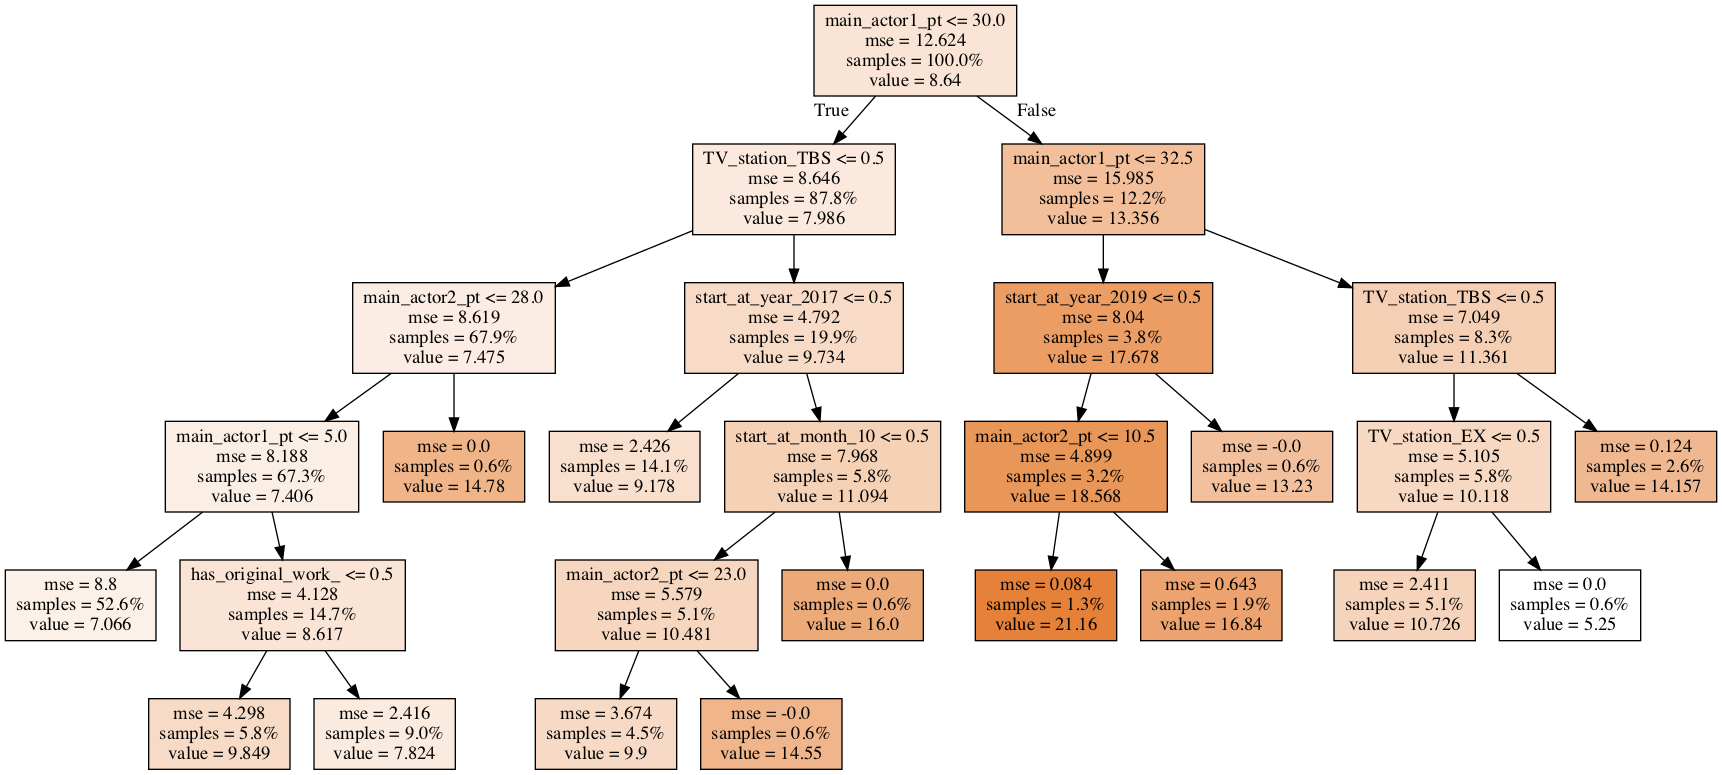

In [88]:
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names="average",
    filled=True,
    proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())